In [9]:
import cv2
import numpy as np 
import argparse
from matplotlib import pyplot as plt

In [10]:
ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image', required=True, help='Please enter the input image')
ap.add_argument('-c', '--config', required=True, help='Please enter the configuration file path')
ap.add_argument('-w', '--weights', required=True, help='Please enter respective weights')
ap.add_argument('-cl','--classes', required=True, help='Please enter the classes')

_StoreAction(option_strings=['-cl', '--classes'], dest='classes', nargs=None, const=None, default=None, type=None, choices=None, help='Please enter the classes', metavar=None)

In [19]:
def get_output_layers(net):
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x,y), (x_plus_w, y_plus_h), color)
    cv2.putText(img, label, (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 4)

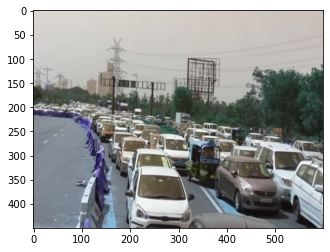

(450, 600, 3)


In [15]:
img = cv2.imread(r"C:\Users\welcome\Downloads\traffic3.jpg")
plt.imshow(img)
plt.show()
print(img.shape)

Width = img.shape[1]
Height = img.shape[0]
scale = 0.00392

classes = None

with open(r"C:\Users\welcome\Data Science\Deep Learning\CNN\YOLO\yolov3.txt", 'r') as f:
    classes = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
''
net = cv2.dnn.readNet(r"C:\Users\welcome\Data Science\Deep Learning\CNN\YOLO\yolov3.weights", 
                      r"C:\Users\welcome\Data Science\Deep Learning\CNN\YOLO\yolov3.cfg")

blob = cv2.dnn.blobFromImage(img, scale, (416,416), (0,0,0), True, crop=False)

net.setInput(blob)

outs = net.forward(get_output_layers(net))

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

In [20]:
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])


indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(img, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

cv2.imshow("object detection Innomatics", img)
cv2.waitKey()
    
cv2.imwrite("object-detection.jpg", img)
cv2.destroyAllWindows()

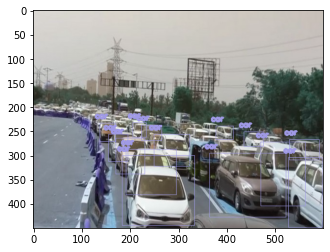

In [22]:
plt.imshow(img)
plt.show()